In [3]:
import pandas as pd
import numpy as np

from analysis_src.basic_data_inspector import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy, CategoricalValuesInspectionStrategy
from analysis_src.missing_values_analysis import SimpleMissingValuesAnalysis

from analysis_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analysis_src.bivariate_analysis import BivariateAnalyzer, CategoricalVsCategoricalAnalysis, CategoricalVsNumericalAnalysis
from analysis_src.multivariate_analysis import SimpleMultivariateAnalysis
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
# Load the data
# Assuming you have already extracted the data into the 'extracted-data' folder

data_path = '../extracted_data/bank.csv'
df = pd.read_csv(data_path)
df = df.replace("unknown", np.nan)

# 📊 Bank Marketing Campaign Dataset
## Feature Overview

### 👤 Client Information
| Feature    | Type   | Description |
|------------|--------|-------------|
| age        | int    | Age of the client |
| job        | str    | Type of job (e.g., admin, technician, services) |
| marital    | str    | Marital status (single, married, divorced) |
| education  | str    | Education level (primary, secondary, tertiary, unknown) |
| default    | str    | Has credit in default? (yes/no/unknown) |
| balance    | int    | Average yearly account balance (in euros) |
| housing    | str    | Has a housing loan? (yes/no) |
| loan       | str    | Has a personal loan? (yes/no) |

### 📞 Campaign Information
| Feature    | Type   | Description |
|------------|--------|-------------|
| contact    | str    | Contact communication type (cellular, telephone, unknown) |
| day        | int    | Day of the month the client was contacted |
| month      | str    | Month of year of contact (jan, feb, …) |
| duration   | int    | Duration of the last call (in seconds) ⚠️ leakage risk if used before call |
| campaign   | int    | Number of contacts during this campaign |
| pdays      | int    | Days since last contact in previous campaign (-1 = never contacted) |
| previous   | int    | Number of contacts before this campaign |
| poutcome   | str    | Outcome of the previous campaign (success, failure, unknown) |

### 🎯 Target
| Feature    | Type   | Description |
|------------|--------|-------------|
| deposit    | str    | Did the client subscribe to a term deposit? (yes/no) |


In [5]:
# Step 1: Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11092 non-null  object
 2   marital    11162 non-null  object
 3   education  10665 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    8816 non-null   object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   2836 non-null   object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [6]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000

In [7]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(CategoricalValuesInspectionStrategy())
data_inspector.execute_inspection(df)


Categorical Features: Unique Values and Frequencies

▶ job (unique=11)
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
Name: count, dtype: int64

▶ marital (unique=3)
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

▶ education (unique=3)
education
secondary    5476
tertiary     3689
primary      1500
Name: count, dtype: int64

▶ default (unique=2)
default
no     10994
yes      168
Name: count, dtype: int64

▶ housing (unique=2)
housing
no     5881
yes    5281
Name: count, dtype: int64

▶ loan (unique=2)
loan
no     9702
yes    1460
Name: count, dtype: int64

▶ contact (unique=2)
contact
cellular     8042
telephone     774
Name: count, dtype: int64

▶ month (unique=12)
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan   


Missing Values Count by Column:
job            70
education     497
contact      2346
poutcome     8326
dtype: int64

Visualizing Missing Values...


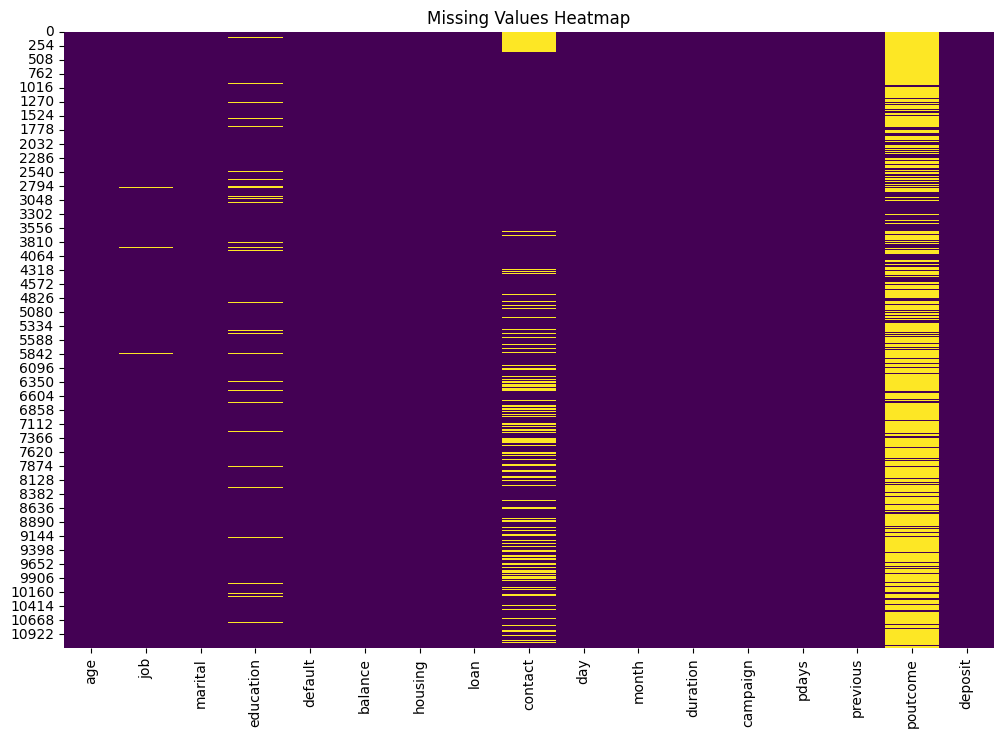

In [8]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

# Insights 

#### **1. Data Types and Non-null Counts:**
- The dataset contains **11,162 entries** and **17 columns**.
- **Data Types**:  
  - **Numerical Features (7)**: `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous`.  
  - **Categorical Features (10)**: `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`, `deposit`.  
- After replacing `"unknown"` with `NaN`, several categorical features contain missing values.

---

#### **2. Summary Statistics:**

- **Categorical Features**:  
  - The target variable `deposit` has two categories (`yes`/`no`), with **`no` being the majority (5,873 clients)**, showing that most clients did not subscribe to a term deposit.  
  - The most common job is **management (2,566 clients)**.  
  - The majority of clients are **married (6,351)**.  
  - The most frequent education level is **secondary (5,476 clients)**.  
  - Most clients **do not have default credit (10,994)**, **do not have a loan (9,702)**, and **slightly more do not have a housing loan (5,881)**.  
  - The most frequent contact type is **cellular (8,042 contacts)**.  
  - The most common campaign month is **May (2,824 contacts)**.  
  - For previous campaigns, most entries are **missing/unknown**; among known cases, the most frequent outcome is **failure (1,228)**.  

- **Numerical Features**:  
  - `age`: Clients range from **18 to 95 years**, with an average of **41 years**.  
  - `balance`: Ranges from **–6,847 to 81,204 euros**, with a mean of **1,529 euros**, indicating strong skewness and outliers.  
  - `day`: Contacts were made throughout the month (1–31), fairly evenly distributed.  
  - `duration`: Calls last from **2 to 3,881 seconds**, average **372 seconds**. ⚠️ Note: this feature is **leakage-prone** since duration is only known after the call.  
  - `campaign`: Most clients were contacted **1–3 times**, but some received up to **63 calls**, showing potential over-contact.  
  - `pdays`: Many clients were never contacted before (value = –1), while others were re-contacted after up to **854 days**.  
  - `previous`: Most clients had **0 previous contacts**, with a few going up to **58**.

---

#### **3. Missing Values Analysis:**
- After treating `"unknown"` as missing (`NaN`):  
  - `job` has 70 missing values.  
  - `education` has 497 missing values.  
  - `contact` has 2,346 missing values.  
  - `poutcome` has 8,326 missing values.  
- These missing values mostly represent **lack of prior information** rather than errors, but handling strategies are required (e.g., imputation or dedicated "missing" category).

---

### **Issues to be Addressed Later**

1. **Handling Missing Data:**  
   - High proportion of missing values in `poutcome` (≈75%).  
   - Moderate missing values in `contact`, `education`, and `job`.  
   - Strategies: keep "missing" as its own category or impute based on related features.  


2. **Outlier Detection and Handling:**  
   - `balance`, `duration`, and `campaign` contain extreme outliers.  
   - Possible treatments: capping, transformation, or robust models.  

3. **Data Leakage:**  
   - The `duration` variable is highly predictive but only known after the call → must be excluded or handled carefully during modeling.  

4. **Categorical Encoding:**  
   - Features like `job`, `education`, and `month` need encoding (e.g., one-hot or target encoding).  

5. **Feature Engineering:**  
   - Possible to create new features:  
     - `contact_month` as seasonality.  
     - Client stability indicators (loan + housing loan + balance categories).  

6. **Correlation and Multicollinearity:**  
   - Campaign-related features (`campaign`, `pdays`, `previous`, `poutcome`) may overlap.  
   - Multicollinearity analysis will be required before modeling.  



--- Analyzing: age ---


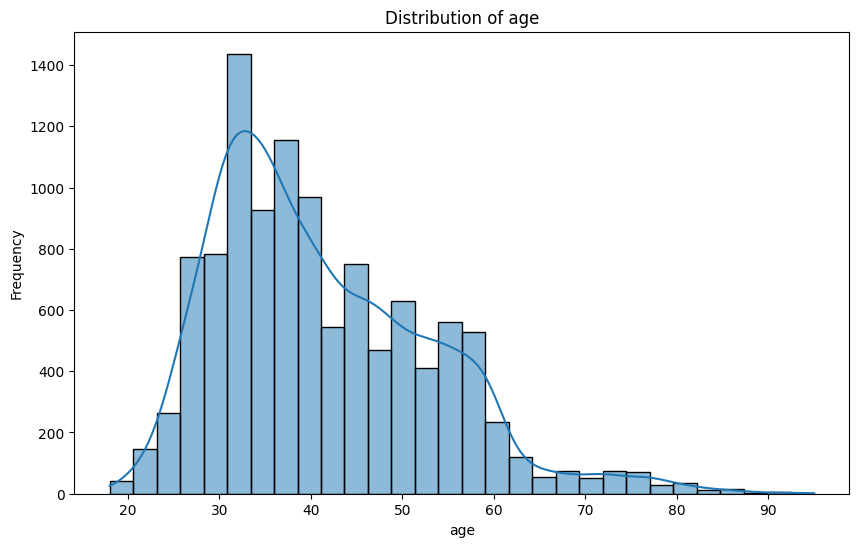


--- Analyzing: balance ---


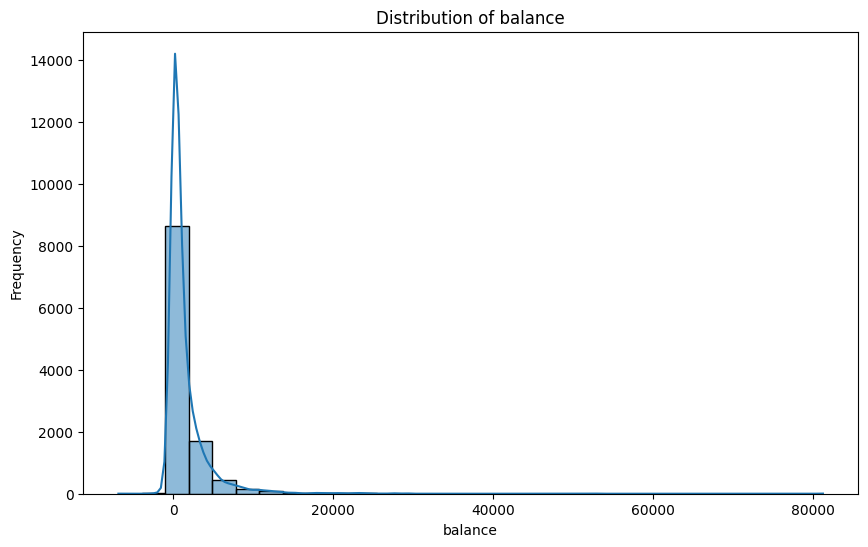


--- Analyzing: day ---


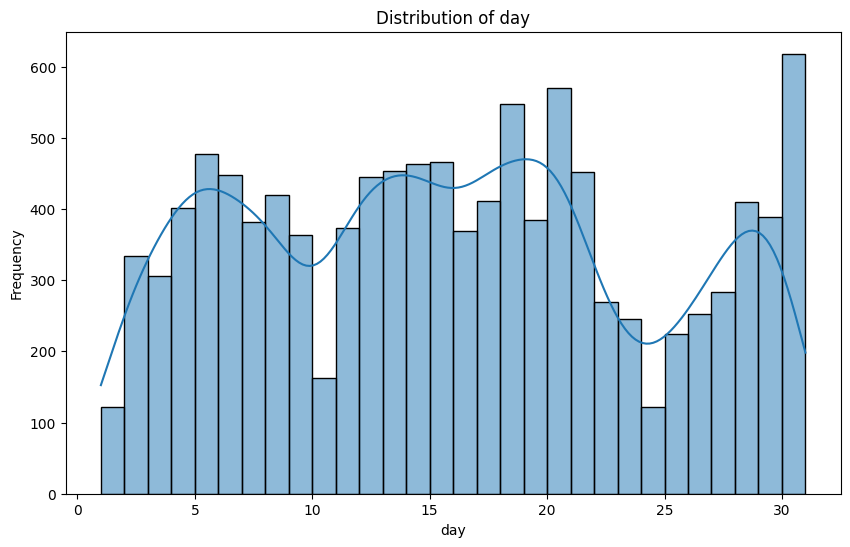


--- Analyzing: duration ---


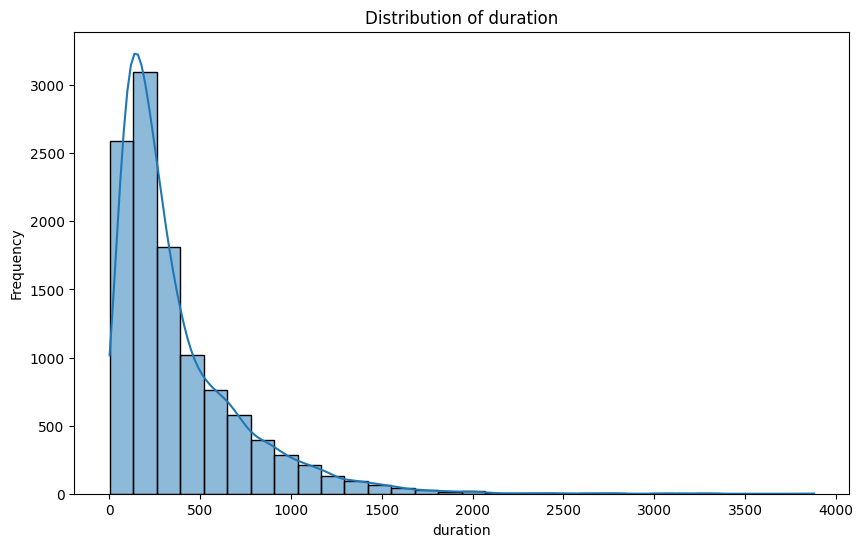


--- Analyzing: campaign ---


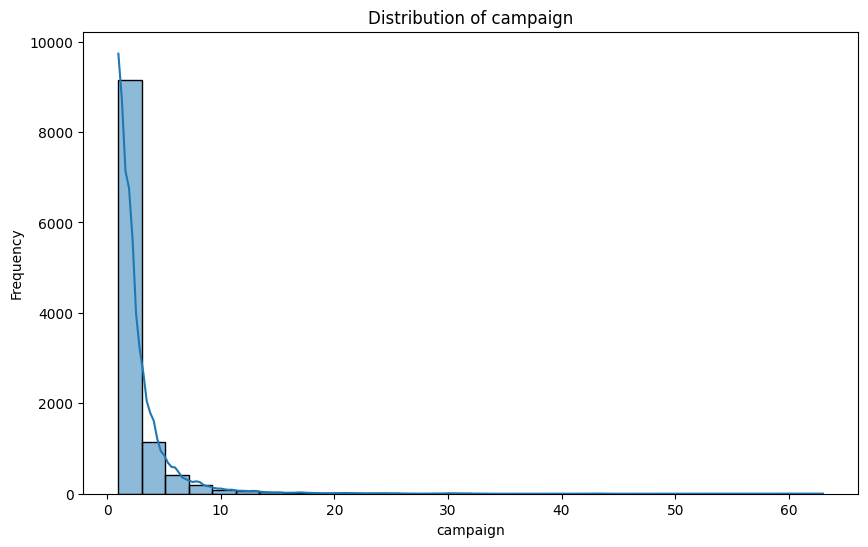


--- Analyzing: pdays ---


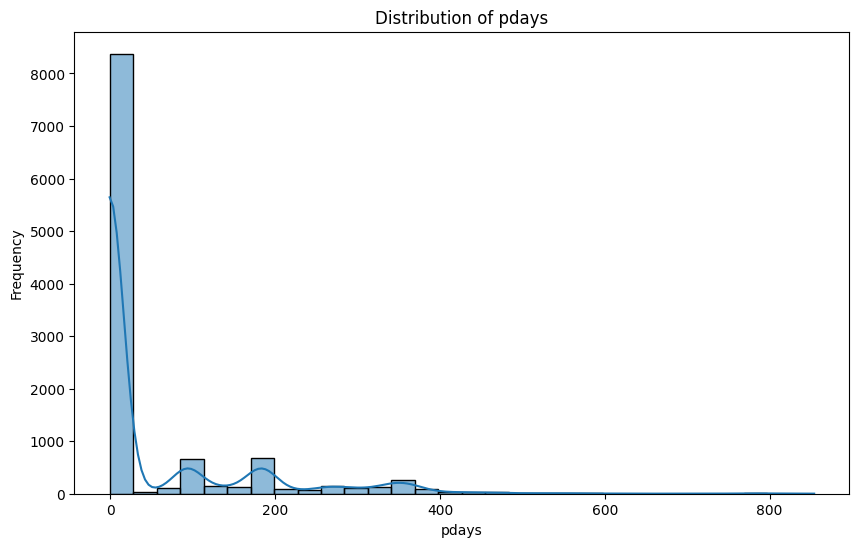


--- Analyzing: previous ---


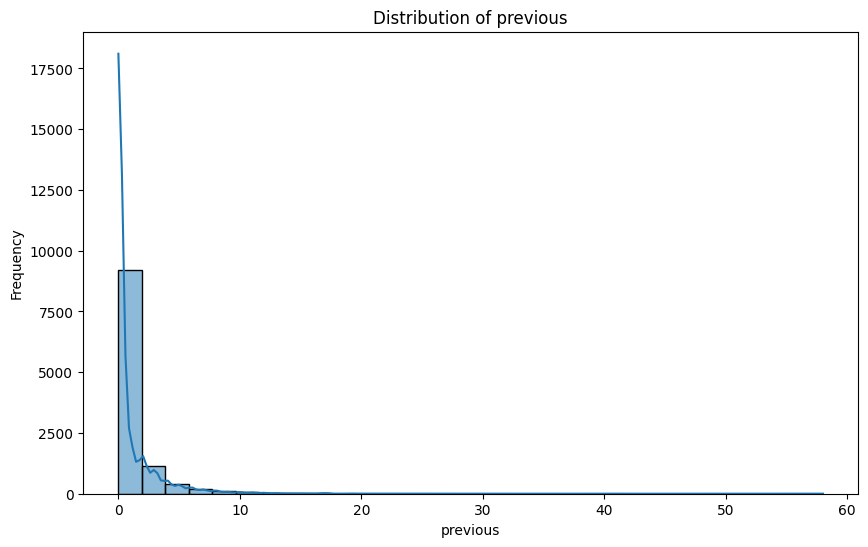

In [9]:
# Step 3: Univariate Analysis for all numerical features

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the analyzer
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())

# Loop through all numerical columns
for col in numerical_cols:
    print(f"\n--- Analyzing: {col} ---")
    univariate_analyzer.execute_analysis(df, col)



--- Analyzing: job ---


c:\Users\HP\Desktop\ML_MLOPS_Project\analysis\analysis_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


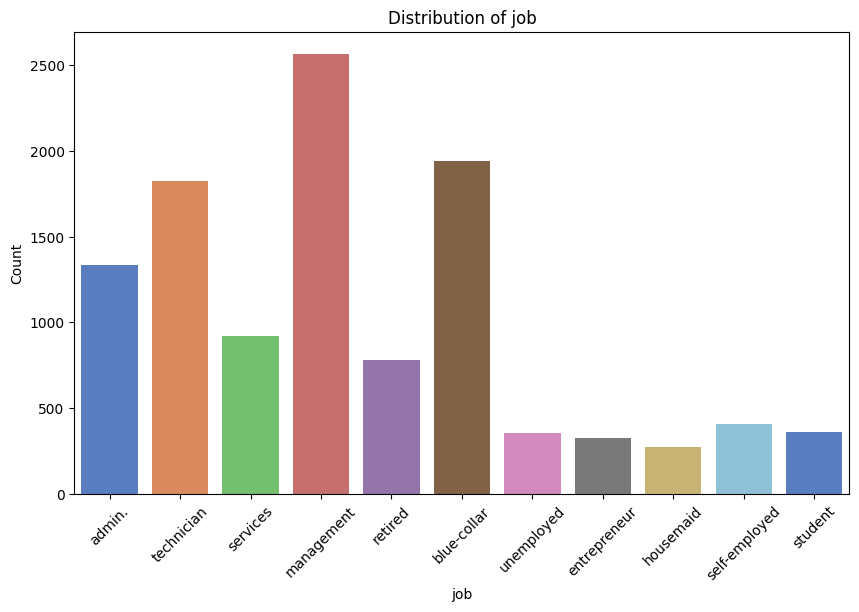


--- Analyzing: marital ---


c:\Users\HP\Desktop\ML_MLOPS_Project\analysis\analysis_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


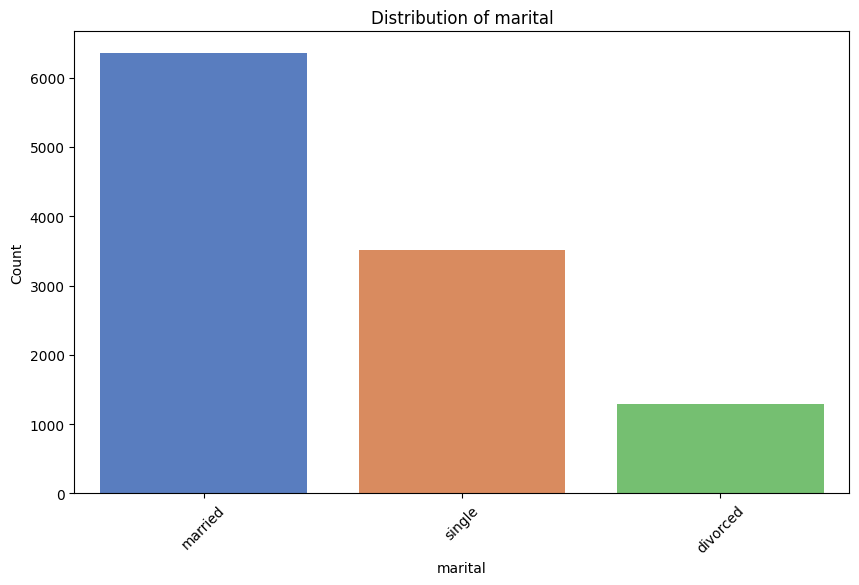


--- Analyzing: education ---


c:\Users\HP\Desktop\ML_MLOPS_Project\analysis\analysis_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


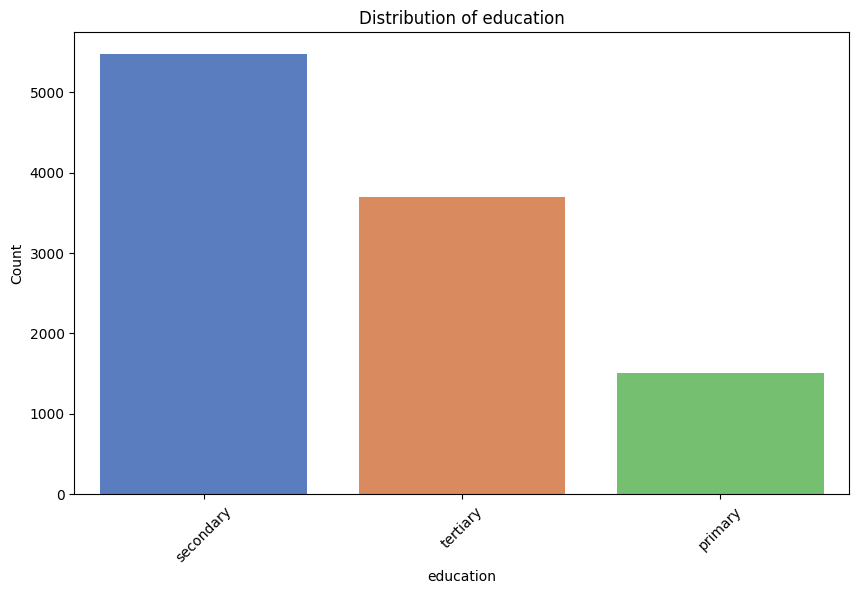


--- Analyzing: default ---


c:\Users\HP\Desktop\ML_MLOPS_Project\analysis\analysis_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


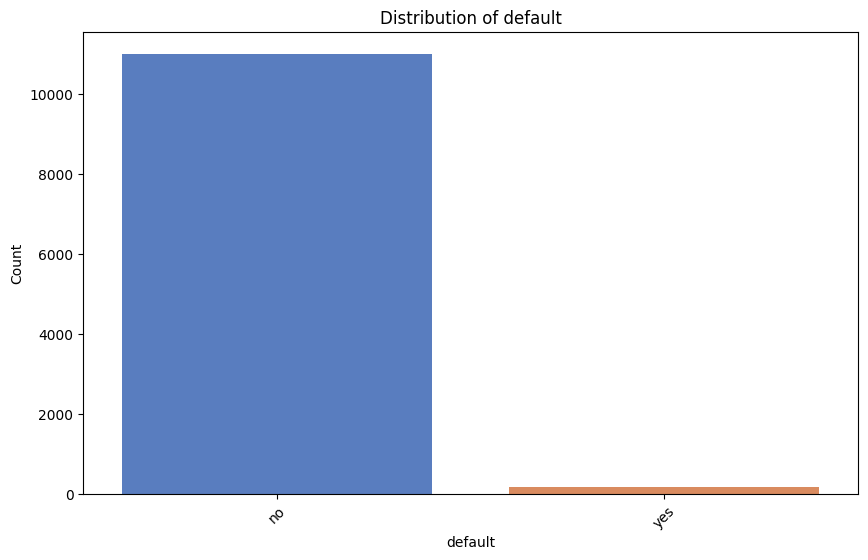


--- Analyzing: housing ---


c:\Users\HP\Desktop\ML_MLOPS_Project\analysis\analysis_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


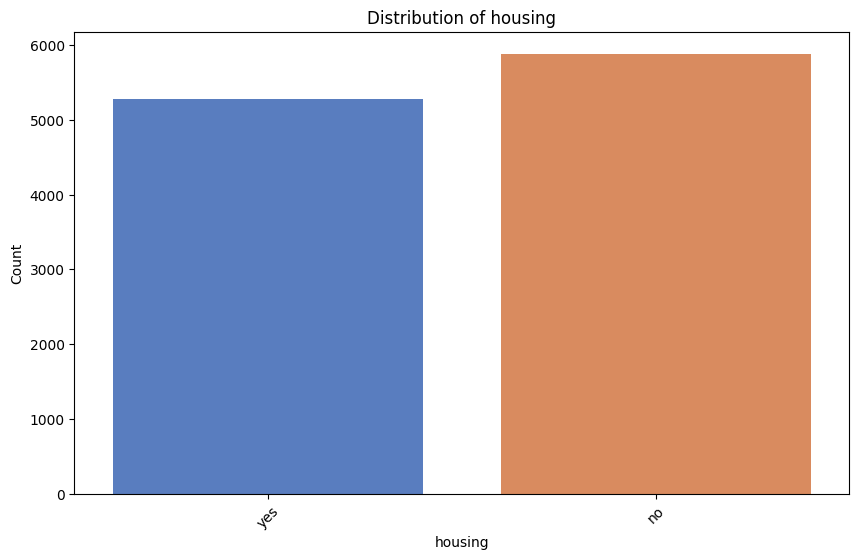


--- Analyzing: loan ---


c:\Users\HP\Desktop\ML_MLOPS_Project\analysis\analysis_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


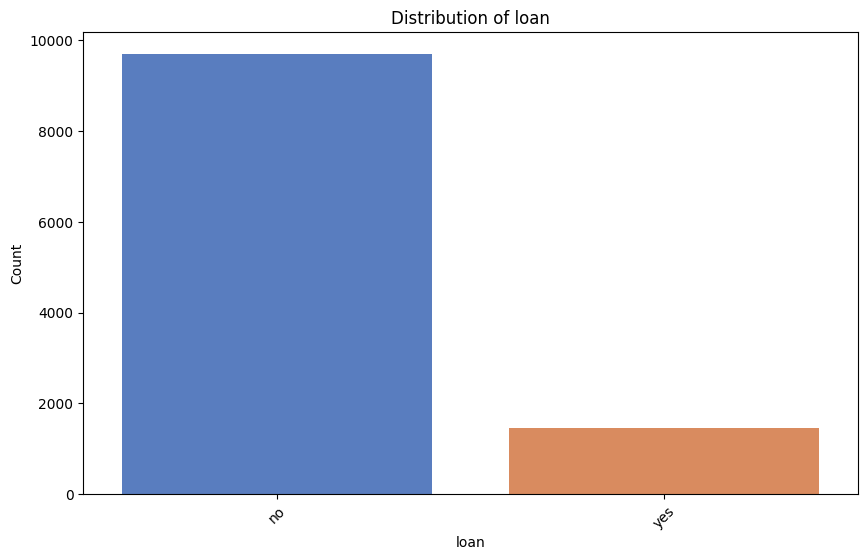


--- Analyzing: contact ---


c:\Users\HP\Desktop\ML_MLOPS_Project\analysis\analysis_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


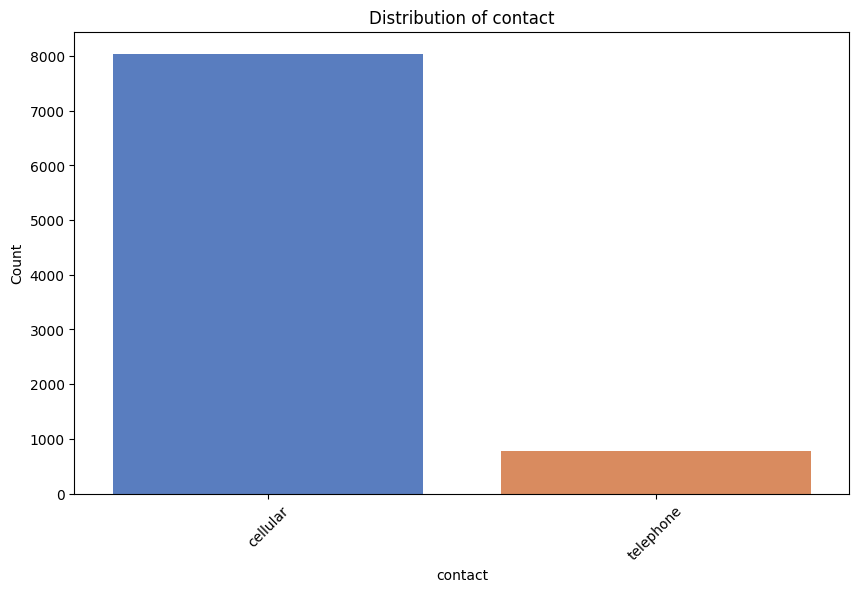


--- Analyzing: month ---


c:\Users\HP\Desktop\ML_MLOPS_Project\analysis\analysis_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


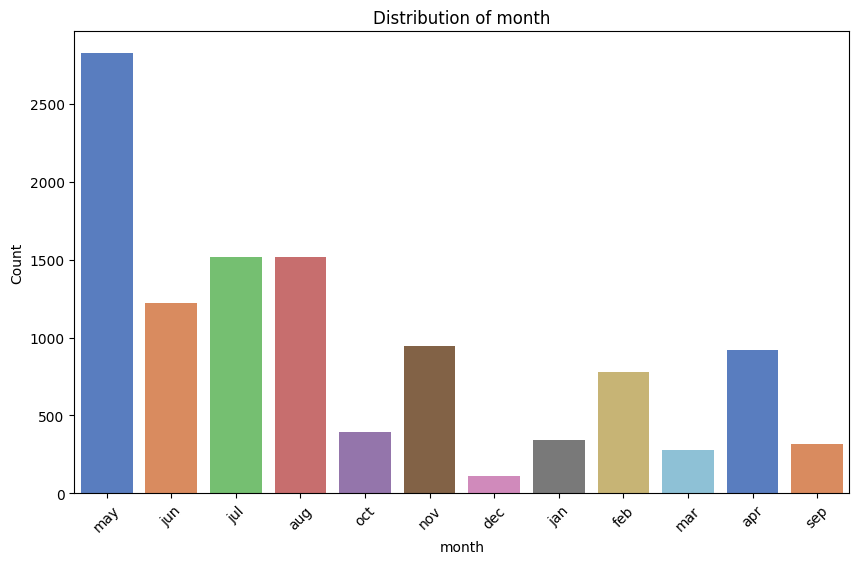


--- Analyzing: poutcome ---


c:\Users\HP\Desktop\ML_MLOPS_Project\analysis\analysis_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


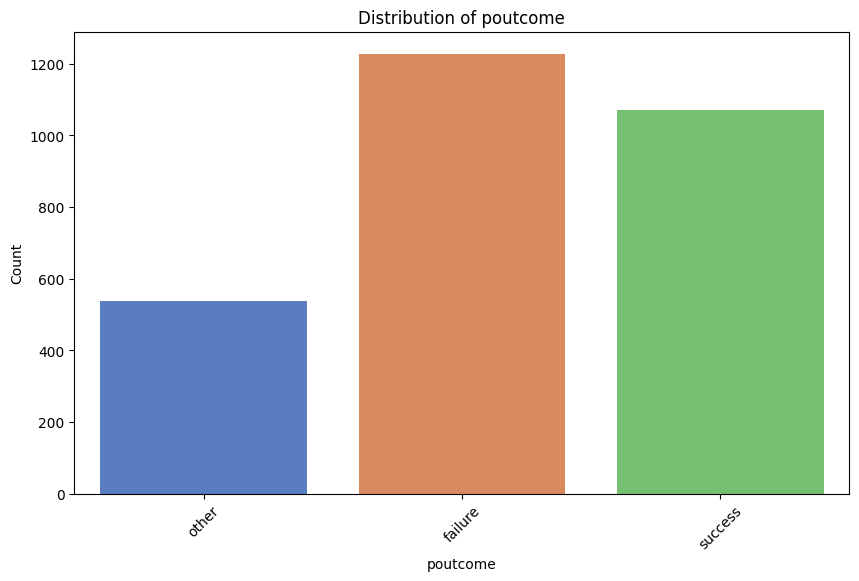


--- Analyzing: deposit ---


c:\Users\HP\Desktop\ML_MLOPS_Project\analysis\analysis_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


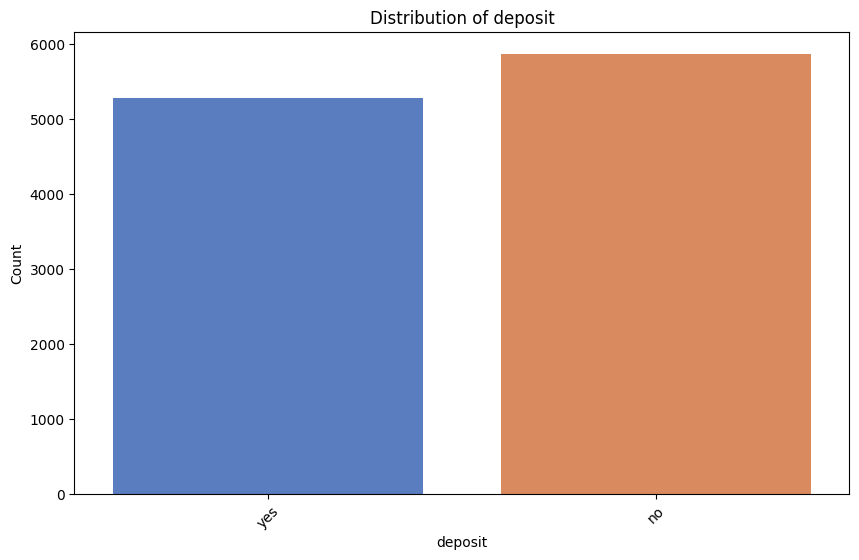

In [10]:
# Step 4: Univariate Analysis for all categorical features

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Set the categorical strategy
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())

# Loop through all categorical columns
for col in categorical_cols:
    print(f"\n--- Analyzing: {col} ---")
    univariate_analyzer.execute_analysis(df, col)


### **Univariate Analysis**


#### **Univariate Analysis (Numerical Features)**

1. **Age**  
- **Insight**: The distribution of age is slightly right-skewed, with most clients between **30 and 50 years old**. Younger clients (<25) and older clients (>60) are less represented.  
- **Implication**: Middle-aged clients are the dominant demographic. Segmenting by age brackets (youth, working-age, retirees) could provide meaningful insights.  

---

2. **Balance**  
- **Insight**: The distribution of `balance` is **heavily skewed**, with many clients close to **zero** and a few with very **high balances**. Negative balances also appear, representing overdrafts.  
- **Implication**: Financial disparity is significant in the dataset. Outliers may require **transformation** (e.g., log scale) or **winsorization** before modeling.  

---

3. **Day of Contact**  
- **Insight**: The `day` variable ranges from 1 to 31, with a nearly uniform distribution and small peaks around mid-month.  
- **Implication**: Alone, `day` may not strongly affect subscription likelihood. However, combined with `month`, it could highlight **seasonal or operational patterns** in campaigns.  

---

4. **Duration of Last Call** ⚠️  
- **Insight**: Most calls are short (<200 seconds), with a few long calls forming a right-skewed tail.  
- **Implication**: Call duration is highly predictive of deposit subscription but introduces **data leakage** (since duration is only known after the call).  
  - **EDA Use**: Valid for descriptive insights.  
  - **Modeling Use**: Should be excluded from predictive features.  

---

5. **Campaign**  
- **Insight**: Most clients were contacted **1–3 times** in the current campaign, with very few exceeding 5 contacts.  
- **Implication**: Higher values may reflect **hard-to-convince clients** or inefficiencies. Extreme cases could be treated as outliers.  

---

6. **Pdays**  
- **Insight**: A majority of values are **-1**, meaning “never contacted before.” For those contacted previously, values vary widely from recent to several hundred days ago.  
- **Implication**: The `-1` category indicates **fresh contacts**. For others, the recency of prior contact could significantly influence conversion. Careful transformation is required.  

---

7. **Previous**  
- **Insight**: Most clients have **0** previous contacts. A small subset had **1–3 prior contacts**, and very few exceeded that.  
- **Implication**: While sparse, this variable interacts strongly with `pdays` and `poutcome` to explain client history and should not be ignored.  


#### **Univariate Analysis (Categorical Features)** 

1. **Job**  
- **Insight**: The most frequent categories are `blue-collar`, `management`, and `technician`. Rare categories include `student` and `unemployed`.  
- **Implication**: Job type is a key socio-economic indicator. Rare categories may need grouping into an "other" category to prevent data sparsity issues during modeling.  

---

2. **Marital Status**  
- **Insight**: The majority of clients are `married`, followed by `single` and `divorced`.  
- **Implication**: Marital status could reflect household stability and financial behavior. While imbalanced, this feature may still contribute predictive power when combined with other socio-demographic variables.  

---

3. **Education**  
- **Insight**: Most clients have `secondary` education, followed by `tertiary`. `Primary` is much less common.  
- **Implication**: Education level often correlates with income and financial literacy, making it a potential driver of deposit subscription.  

---

4. **Default**  
- **Insight**: The vast majority of clients are `no` (no credit in default). Very few are `yes`.
- **Implication**: The imbalance indicates this variable may not provide strong standalone predictive power, but it could be useful when combined with other financial features such as loans.  

---

5. **Housing Loan**  
- **Insight**: A significant proportion of clients have a `housing` loan compared to those who do not.  
- **Implication**: Having a housing loan reflects financial commitments that may reduce the likelihood of subscribing to deposits.  

---

6. **Personal Loan**  
- **Insight**: Most clients do not have a personal loan, with `yes` being a minority response.  
- **Implication**: Like housing loans, personal loans suggest higher liabilities and may negatively influence deposit subscription.  

---

7. **Contact Type**  
- **Insight**: The most frequent contact method is `cellular`, followed by `telephone`. A considerable number of entries are marked `unknown`.  
- **Implication**: Contact method could influence success rates, as `cellular` calls are generally more effective than landline or missing information.  

---

8. **Month of Contact**  
- **Insight**: Contact attempts are unevenly distributed across months, with peaks in `May`, `July`, and `August`.  
- **Implication**: This highlights the **seasonality** of marketing campaigns, which could introduce bias into the dataset if not accounted for.  

---

9. **Previous Campaign Outcome (poutcome)**  
- **Insight**: Most entries are `null`, meaning no previous contact. Among known outcomes, `failure` dominates, while `success` is rare.  
- **Implication**: This imbalance is meaningful. `Unknown` are mostly first-time contacts, while prior `success` strongly predicts deposit subscription.  

---

10. **Deposit (Target Variable)**  
- **Insight**: Most clients did **not** subscribe (`no`), while a smaller proportion subscribed (`yes`).  
- **Implication**: The dataset is **imbalanced**, leaning toward non-subscribers. Any predictive model should address this imbalance using class weights or resampling techniques.  



=== Analyzing marital vs age ===


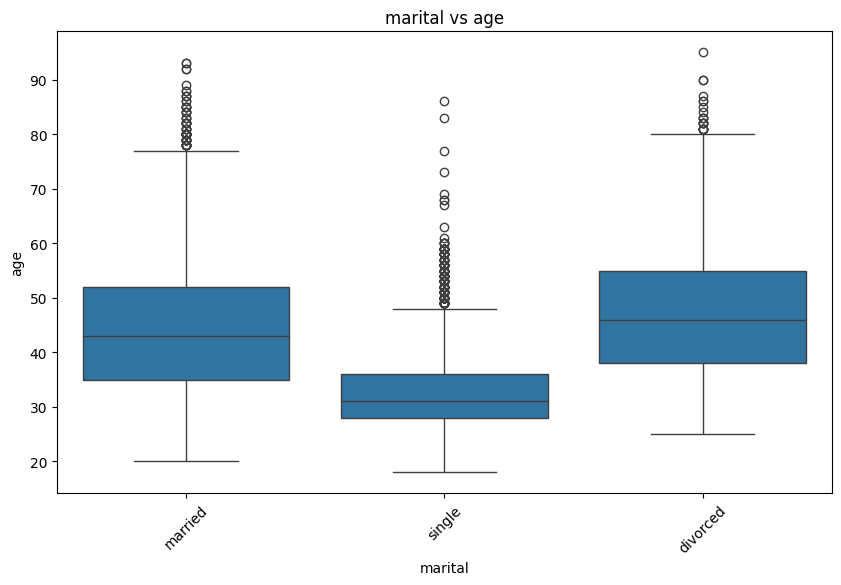


=== Analyzing education vs age ===


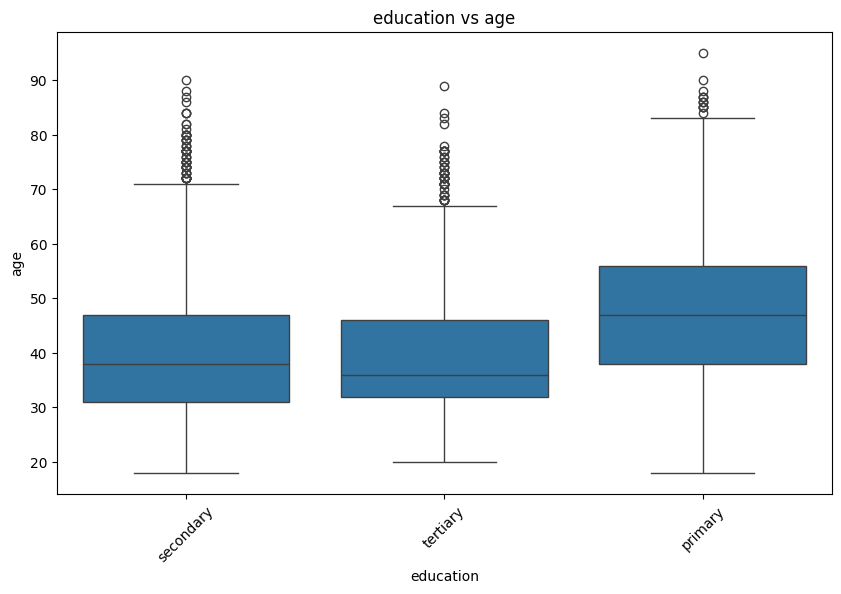


=== Analyzing job vs age ===


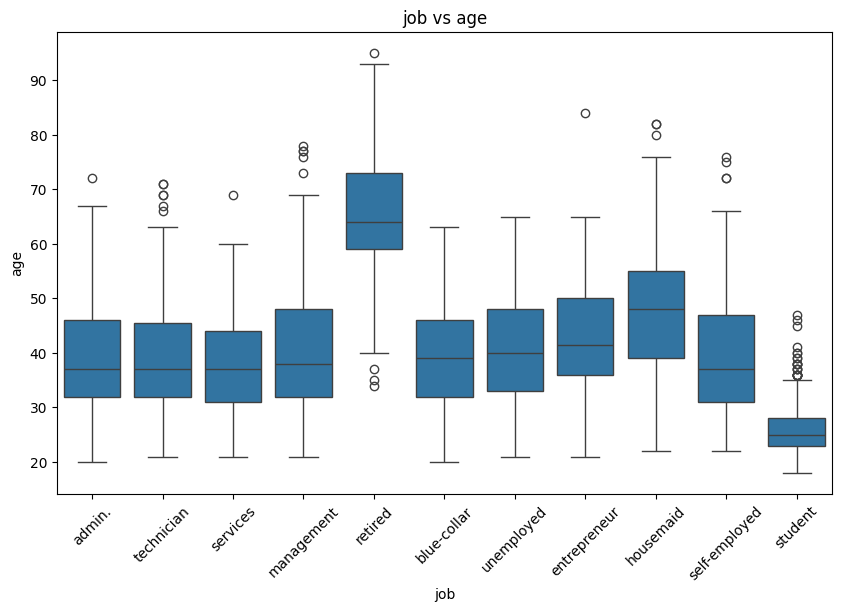


=== Analyzing housing vs age ===


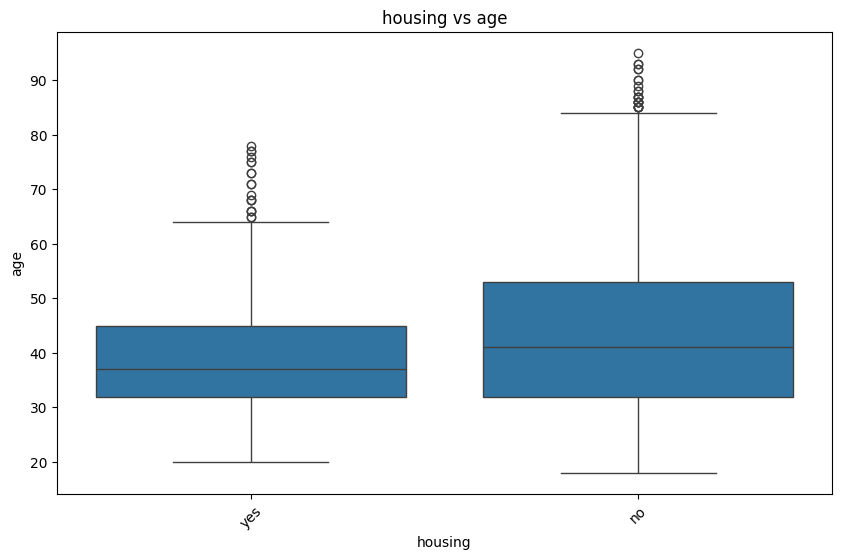


=== Analyzing loan vs age ===


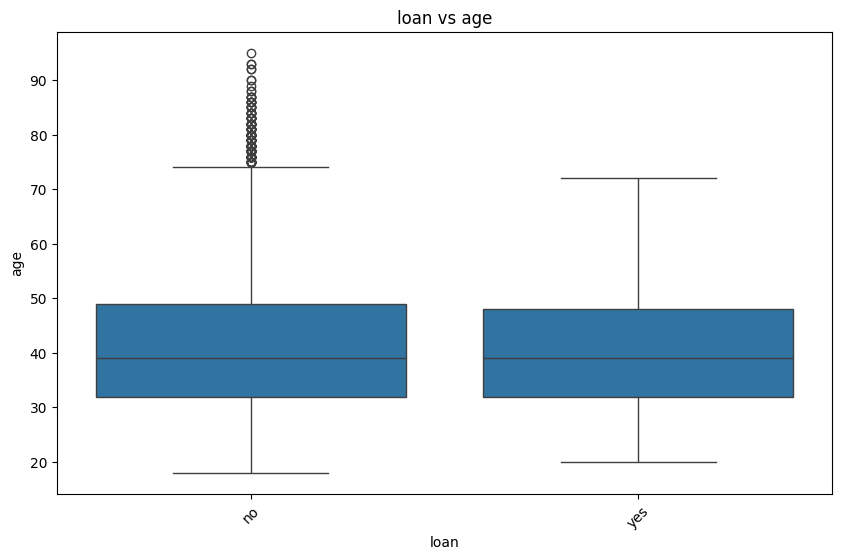


=== Analyzing deposit vs age ===


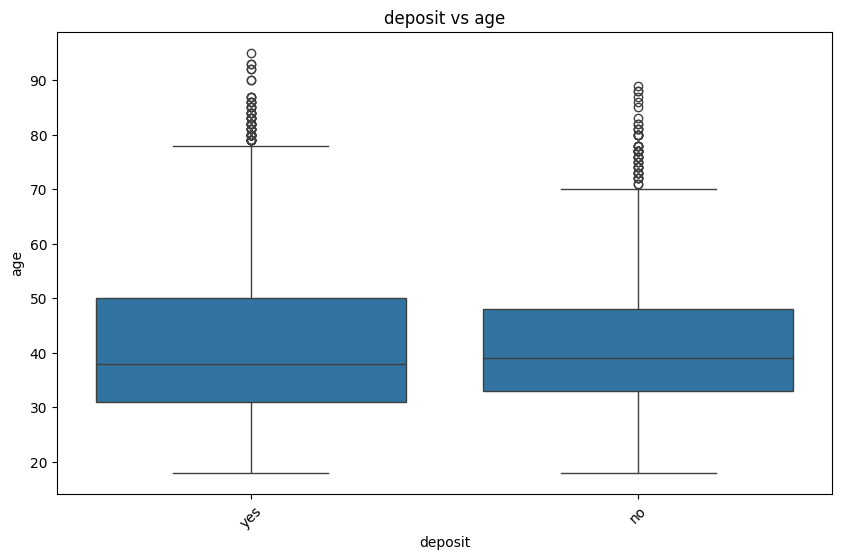


=== Analyzing marital vs balance ===


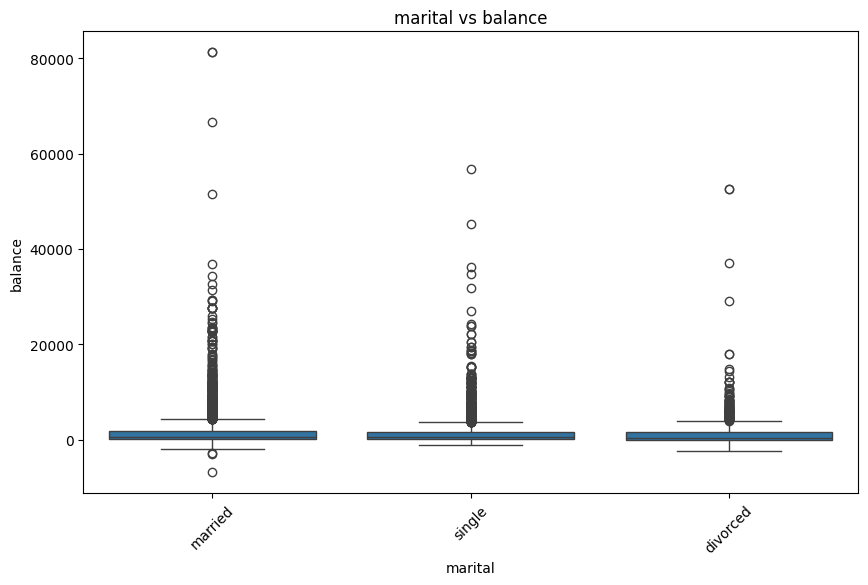


=== Analyzing education vs balance ===


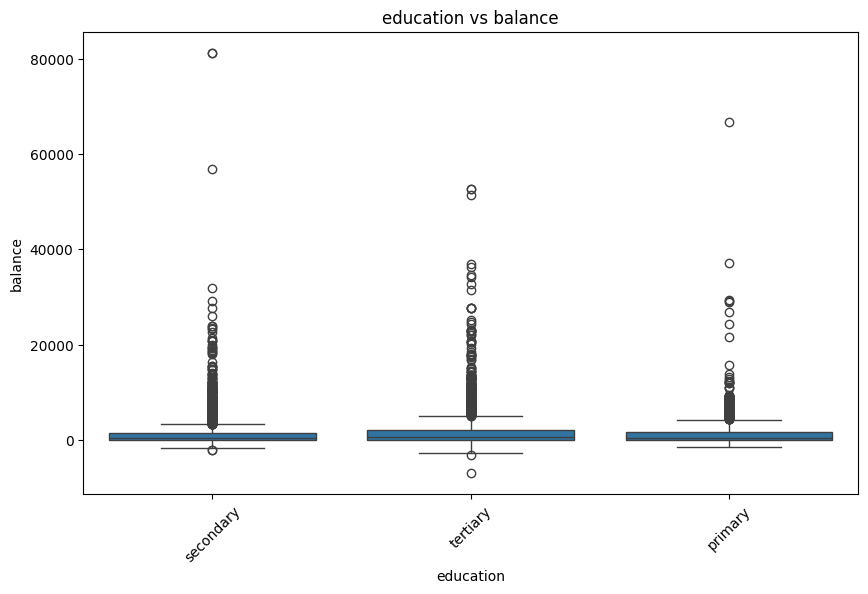


=== Analyzing job vs balance ===


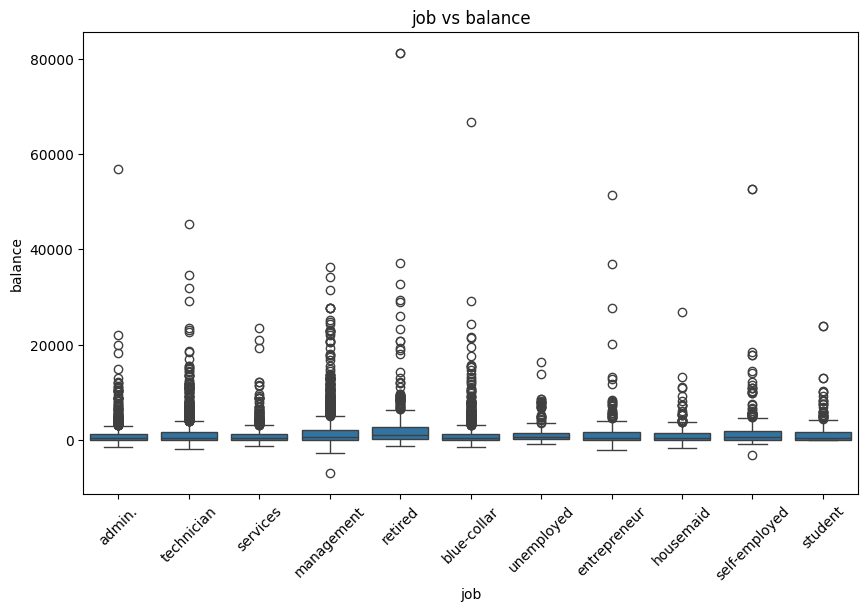


=== Analyzing housing vs balance ===


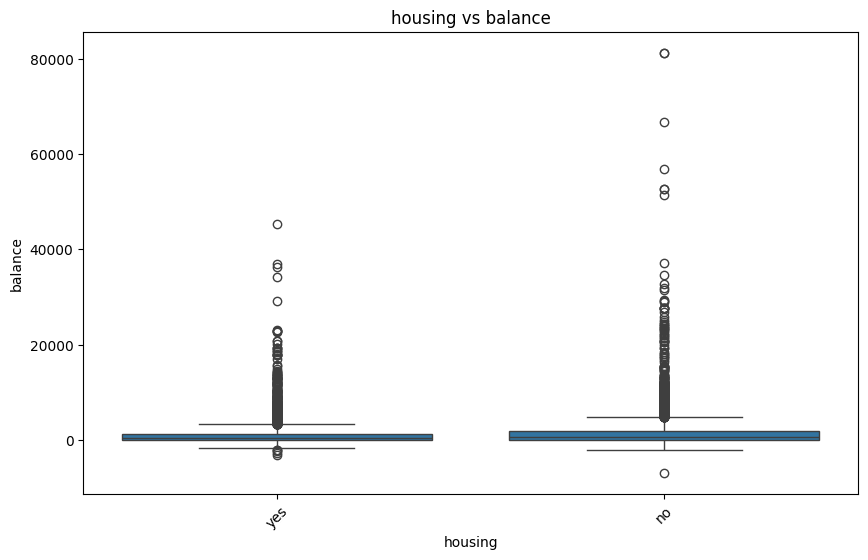


=== Analyzing loan vs balance ===


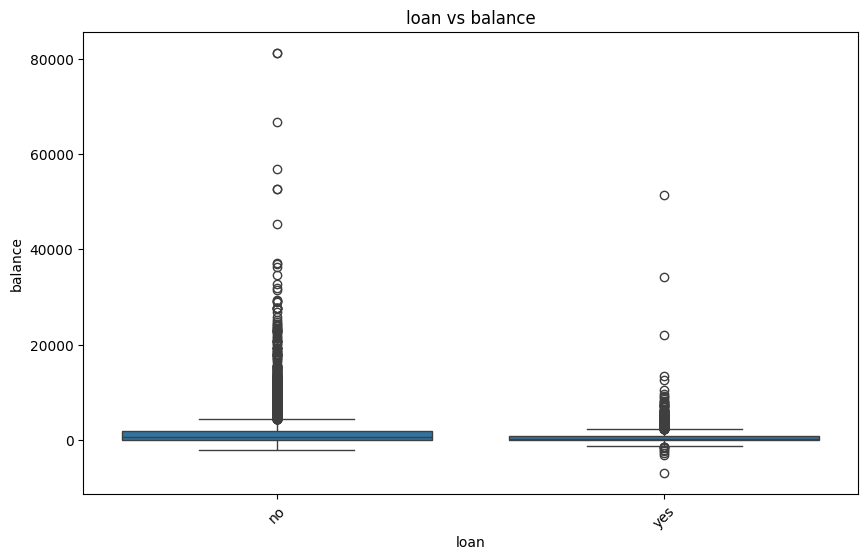


=== Analyzing deposit vs balance ===


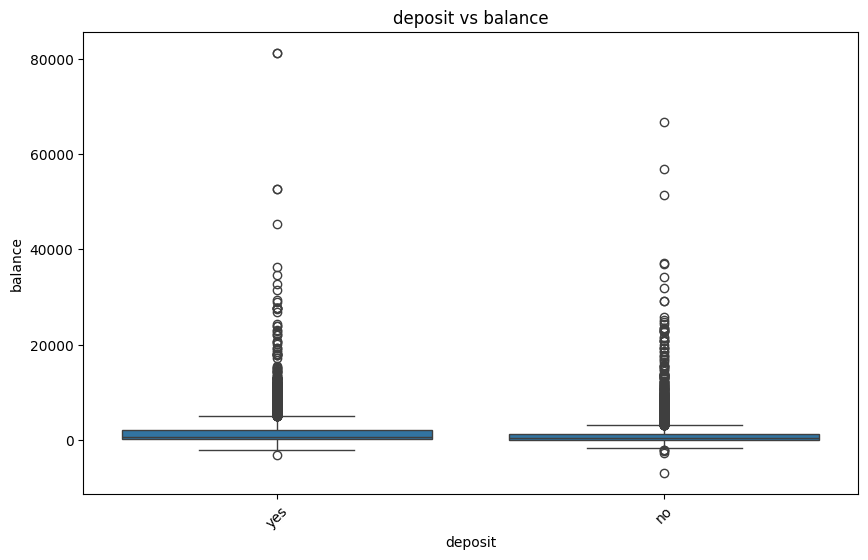

In [11]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between categorical and numerical features

pairs_to_analyze = [

    ("marital", "age"),
    ("education", "age"),
    ("job", "age"),
    ("housing", "age"),
    ("loan", "age"),
    ("deposit", "age"),
    ("marital", "balance"),
    ("education", "balance"),
    ("job", "balance"),
    ("housing", "balance"),
    ("loan", "balance"),
    ("deposit", "balance")
]
bivariate_analyzer = BivariateAnalyzer(CategoricalVsNumericalAnalysis)

# Run analysis for each pair
for cat, num in pairs_to_analyze:
    print(f"\n=== Analyzing {cat} vs {num} ===")
    bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
    bivariate_analyzer.execute_analysis(df, cat, num)

In [12]:

# Step 5: Multivariate Analysis
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()



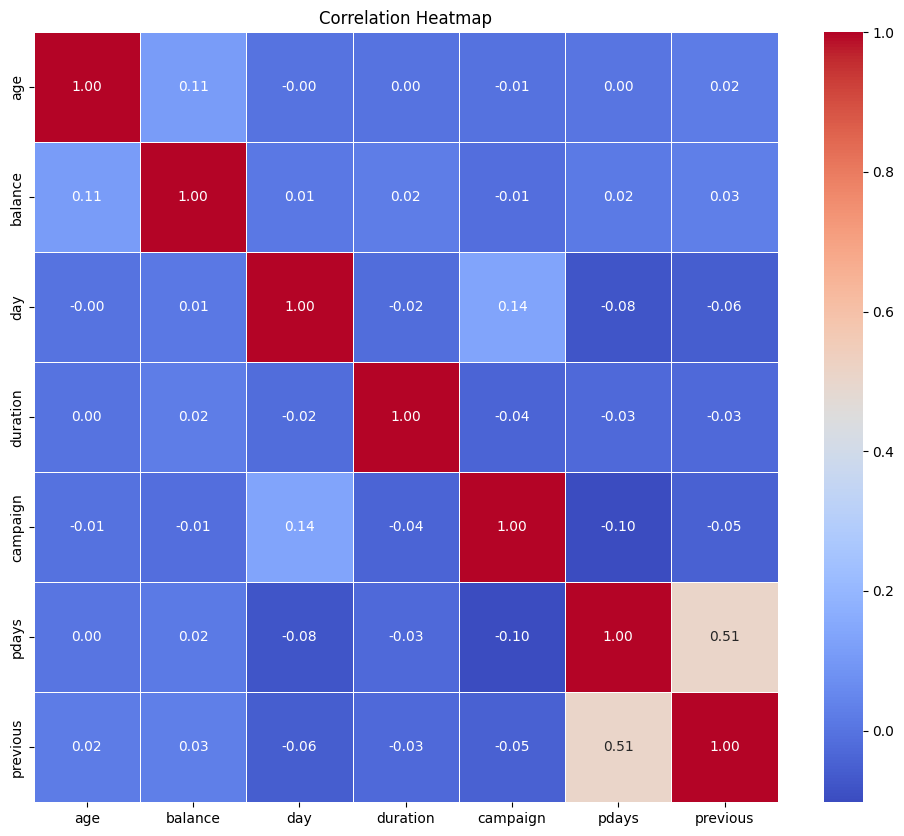

In [14]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
multivariate_analyzer.generate_correlation_heatmap(df[numerical_cols])

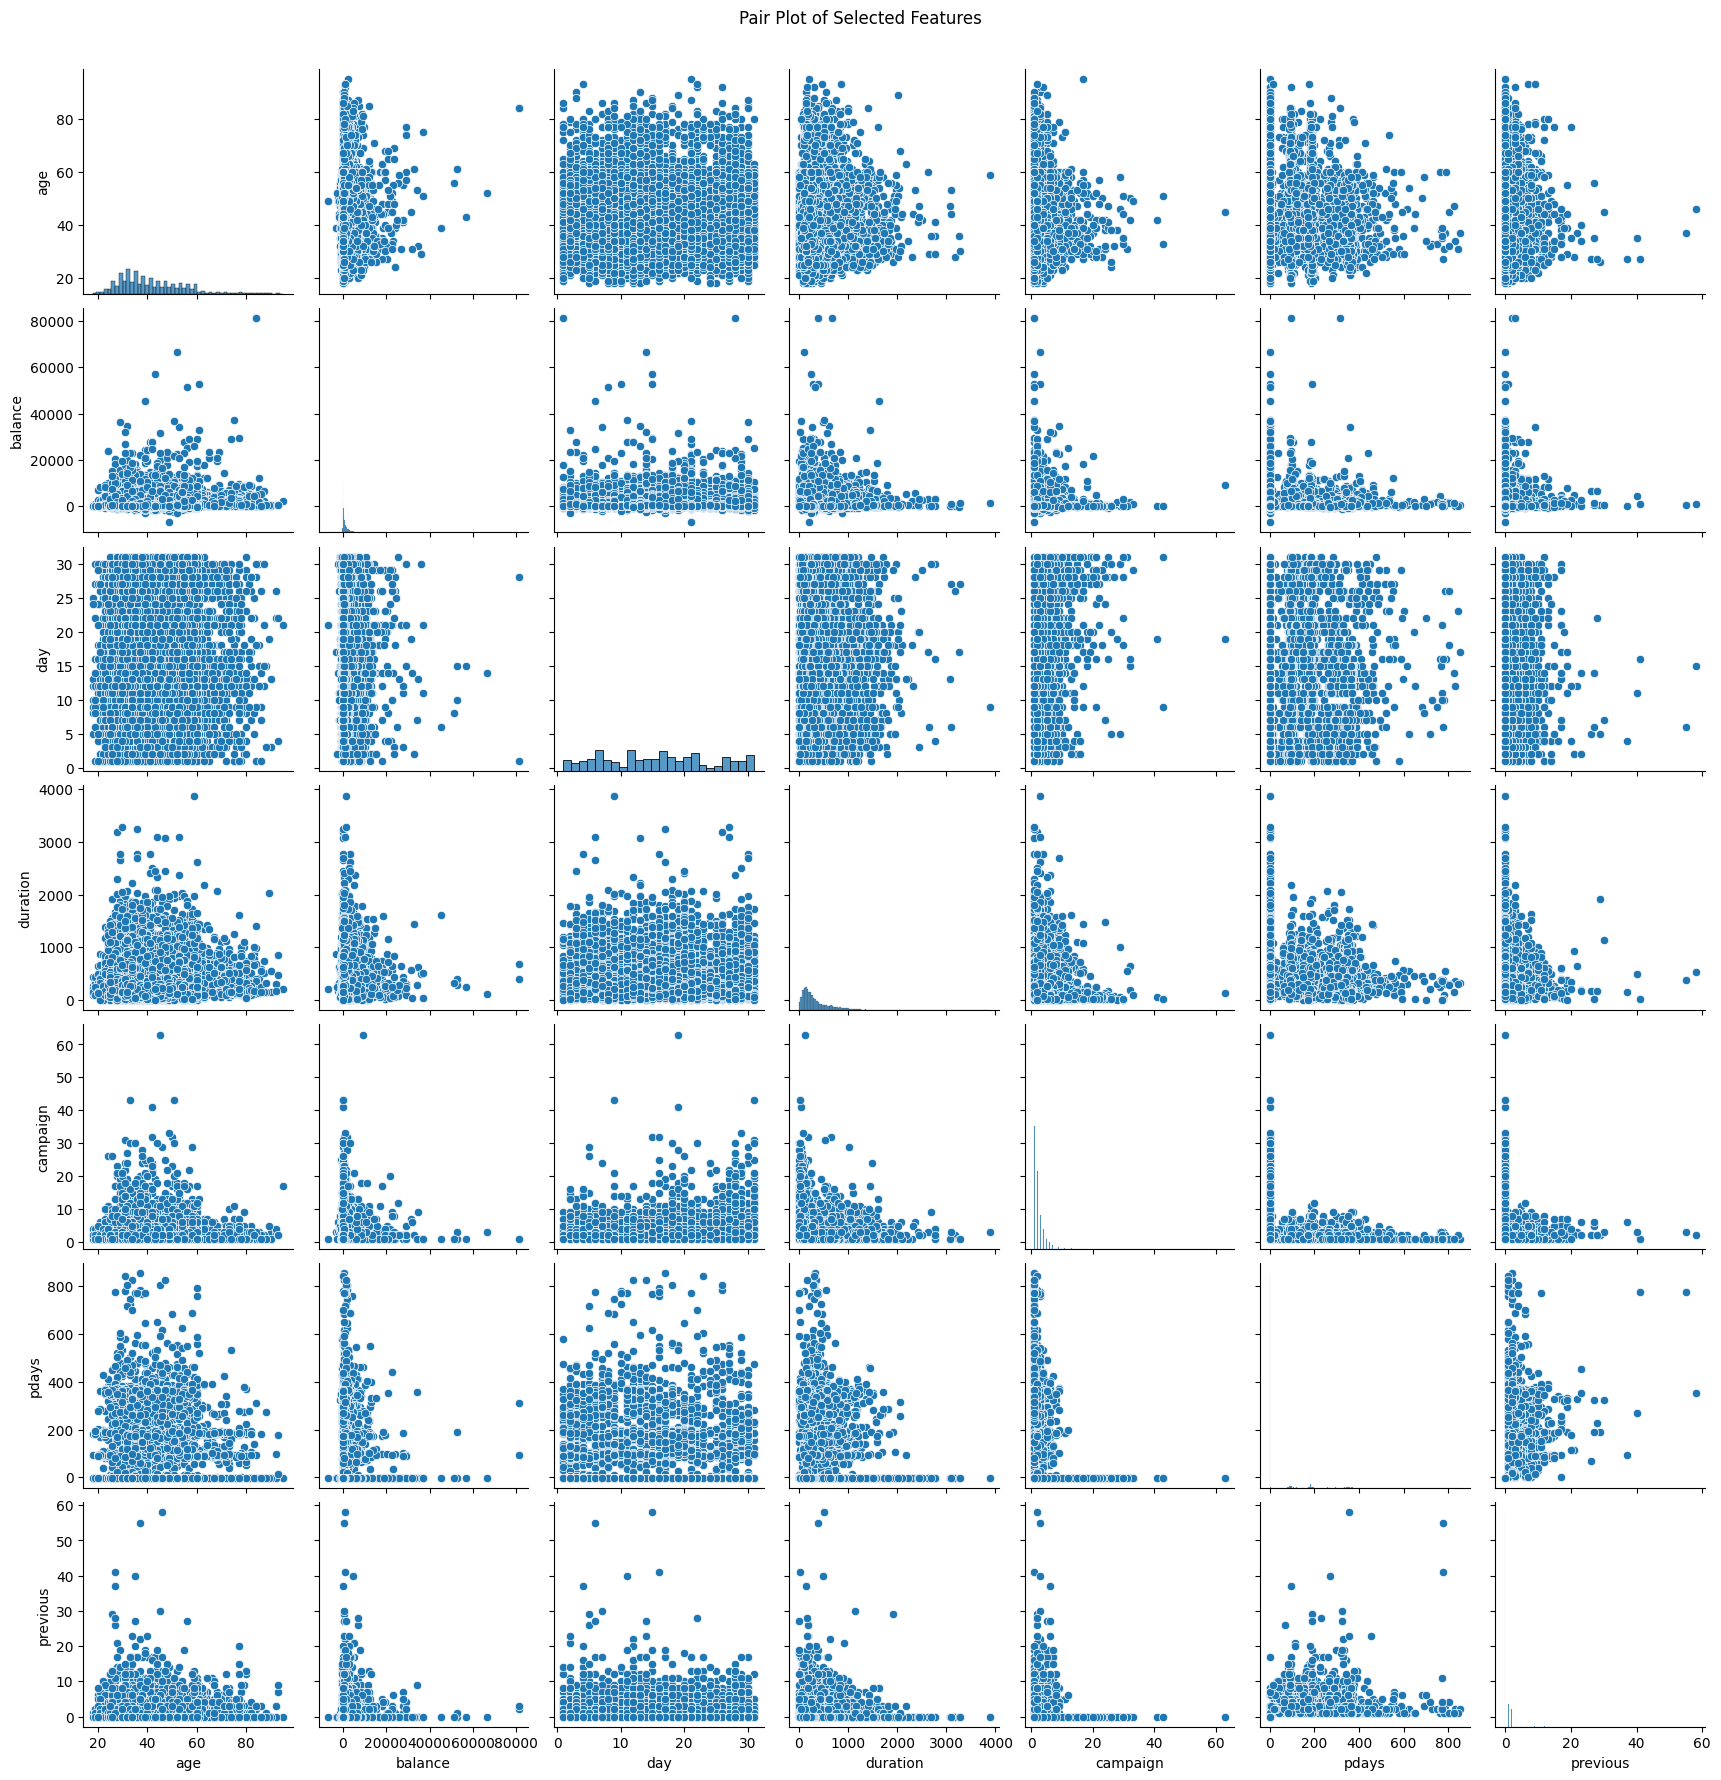

In [15]:
multivariate_analyzer.generate_pairplot(df)

### **Insights from Multivariate Analysis**

#### **Correlation Heatmap, Pair Plot:**
The correlation heatmap and Pair Plot suggests that numerical features in the Bank Campaign dataset are not strongly linearly correlated with each other. This indicates that potential relationships between features and the target may be non-linear or more complex.
